## Introduction

Exploratory Data Analysis (EDA) is performed to understand the structure, characteristics, and quality of the student performance dataset. This step helps in identifying important features, detecting patterns, and gaining insights that guide further machine learning and analytics tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Dataset Description

The dataset used in this analysis is the UCI Student Performance Dataset. It contains demographic, academic, and behavioral attributes of students along with their internal and final assessment scores. The dataset is used to analyze factors influencing student performance and to identify at-risk students.


In [2]:
df = pd.read_csv("student_performance.csv", sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Basic Dataset Information

This section examines the size of the dataset, the number of features, and the data types of each attribute. Understanding the dataset structure is essential before performing preprocessing and analysis.


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Missing Value Analysis

Missing values can affect the accuracy of machine learning models. This section checks for the presence of missing values in the dataset and helps determine whether data cleaning or imputation is required.


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Observation:
The dataset does not contain missing values. Therefore, no imputation is required at this stage.


## Target Variable Analysis

The final grade (G3) represents the academic outcome of students and is treated as the primary target variable. Analyzing its distribution helps understand overall student performance and detect skewness or outliers.


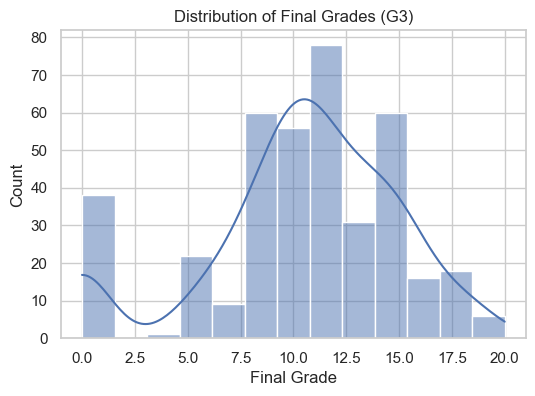

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

## Risk Categorization

To support decision-making, students are categorized into risk levels based on their final grades. This transformation converts raw scores into meaningful categories that can help identify students who require academic intervention.


In [8]:
df['risk_level'] = pd.cut(
    df['G3'],
    bins=[-1, 9, 14, 20],
    labels=['High Risk', 'Medium Risk', 'Low Risk']
)

df['risk_level'].value_counts()


risk_level
Medium Risk    192
High Risk      130
Low Risk        73
Name: count, dtype: int64

In [9]:
df['risk_level'].isnull().sum()


np.int64(0)

### Note:
Boundary values were handled explicitly while categorizing risk levels to ensure that all valid grade values were included in the defined intervals.


## Risk Level Distribution

This section visualizes the distribution of students across different risk categories. Understanding the proportion of high-risk, medium-risk, and low-risk students is important for academic planning and intervention strategies.


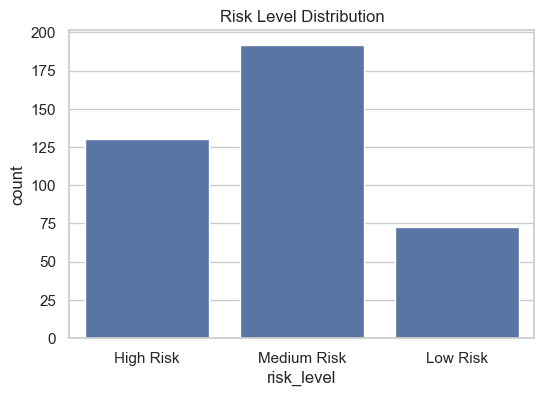

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title("Risk Level Distribution")
plt.show()


## Relationship Between Key Numerical Features

This section analyzes relationships between important numerical attributes such as study time, absences, and internal assessment scores. Pairwise plots help identify trends and strong predictors of final performance.


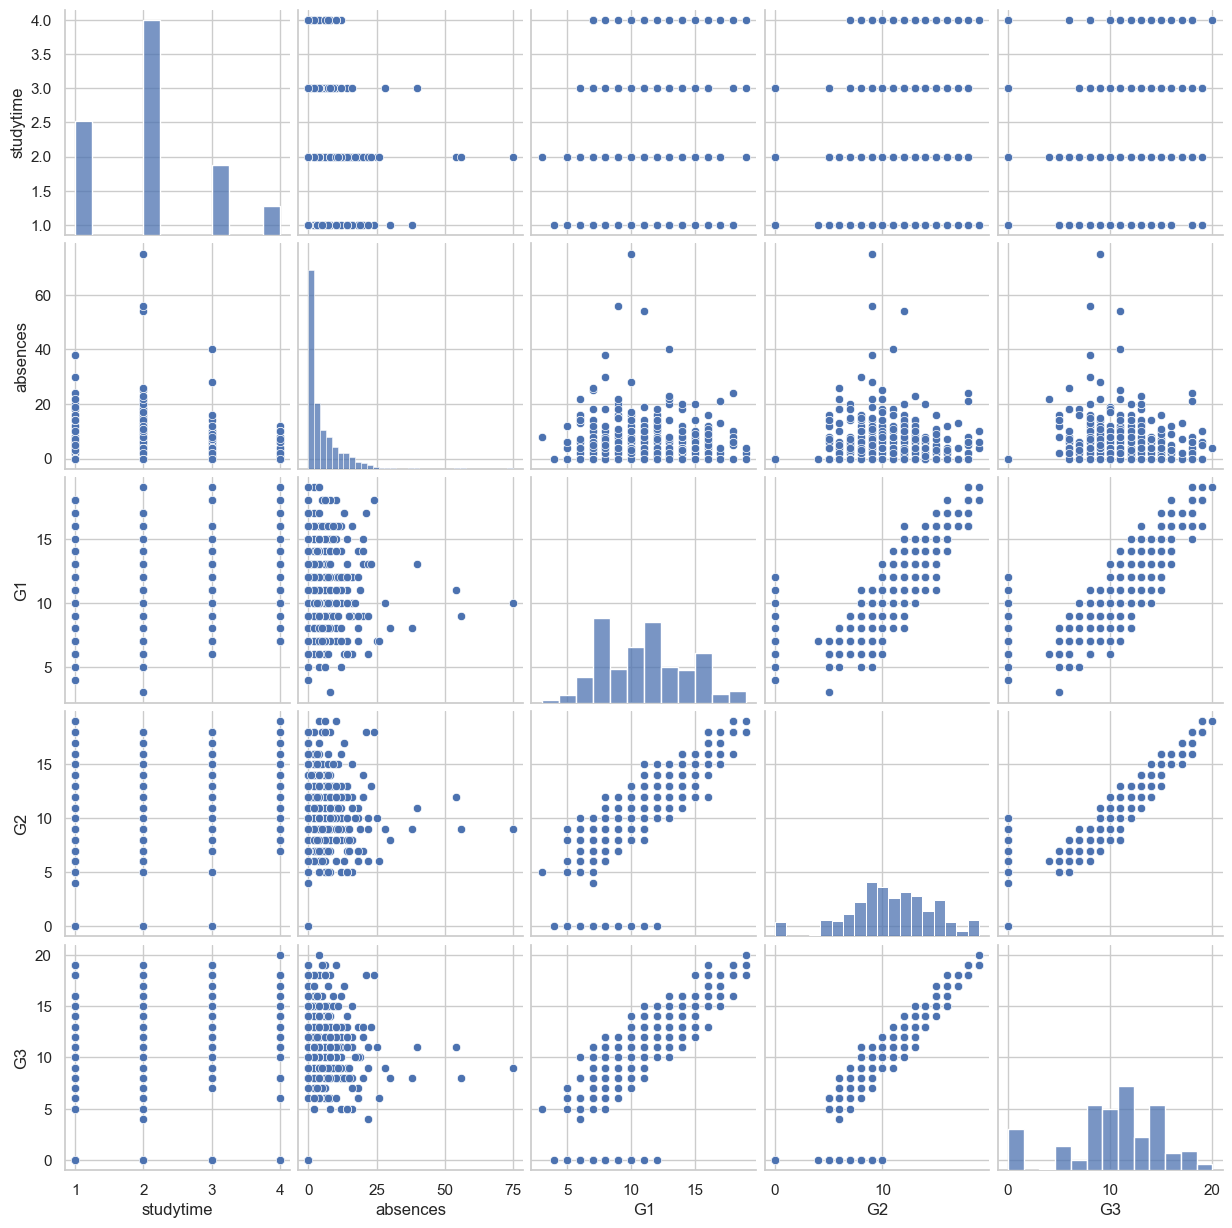

In [11]:
num_cols = ['studytime', 'absences', 'G1', 'G2', 'G3']

sns.pairplot(df[num_cols])
plt.show()


## Correlation Analysis

Correlation analysis is performed to identify relationships between numerical features. Highly correlated variables may indicate redundancy and motivate the use of dimensionality reduction techniques such as PCA.


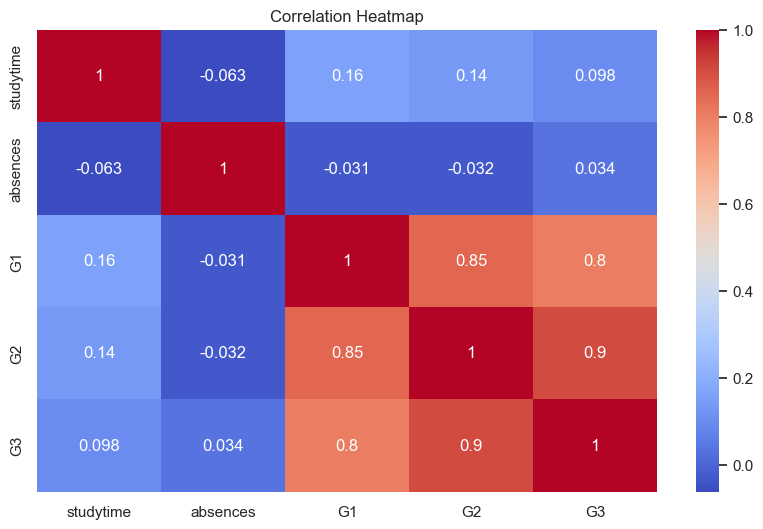

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Key Insights from EDA

- Internal assessment scores (G1 and G2) show a strong positive correlation with final grades (G3).
- Higher absence levels are associated with increased academic risk.
- Clear separation exists between different risk categories.
- The dataset is suitable for supervised learning, clustering, and dimensionality reduction.


In [13]:
df.to_csv("student_performance_cleaned.csv", index=False)

## Conclusion

The exploratory data analysis provides valuable insights into student performance patterns and influencing factors. The observations from EDA guide feature selection, model choice, and further machine learning analysis in subsequent stages of the project.
